In [1]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
pd.set_option('display.float_format', lambda x: '%.6f' % x)

In [2]:
region = "San Francisco, CA"
stock_name = "SPY"

In [3]:
stock = yf.Ticker(stock_name)
stock_history = stock.history(period="max")
stock_history["date"] = stock_history.index

In [4]:
stock_history['%Change'] = stock_history['Close'].pct_change()
stock_history['Compound'] = stock_history['%Change'].apply(lambda x: x+1).cumprod()
stock_history["principal"] = np.full(stock_history.shape[0], 1000)
stock_history["investment_value"] = stock_history["principal"] * stock_history['Compound']
stock_history["yearmonth"] = stock_history["date"].dt.strftime('%Y-%m')

In [5]:
stock_history

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,%Change,Compound,principal,investment_value,yearmonth
Date,,,,,,,,,,,,,
1993-01-29,25.645419,25.645419,25.517829,25.627192,1003200,0.000000,0,1993-01-29,NaN,NaN,1000,NaN,1993-01
1993-02-01,25.645411,25.809454,25.645411,25.809454,480500,0.000000,0,1993-02-01,0.007112,1.007112,1000,1007.112072,1993-02
1993-02-02,25.791222,25.882357,25.736541,25.864130,201300,0.000000,0,1993-02-02,0.002118,1.009246,1000,1009.245589,1993-02
1993-02-03,25.900605,26.155783,25.882378,26.137556,529400,0.000000,0,1993-02-03,0.010572,1.019915,1000,1019.914961,1993-02
1993-02-04,26.228677,26.301585,25.937045,26.246904,531500,0.000000,0,1993-02-04,0.004184,1.024182,1000,1024.181847,1993-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-21,458.609985,463.209991,456.309998,463.059998,69806300,0.000000,0,2021-12-21,0.017759,18.069089,1000,18069.088717,2021-12
2021-12-22,462.790009,467.809998,462.579987,467.690002,58890200,0.000000,0,2021-12-22,0.009999,18.249756,1000,18249.756383,2021-12
2021-12-23,468.750000,472.190002,468.640015,470.600006,56384300,0.000000,0,2021-12-23,0.006222,18.363308,1000,18363.307790,2021-12


In [6]:
housing = pd.read_csv("Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")

In [7]:
# Top 10 most expensive locales
housing.sort_values(by='2021-11-30', ascending=False).head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30
34,395059,34,"San Jose, CA",Msa,CA,430667.000000,433251.000000,436946.000000,447493.000000,457596.000000,...,1313372.000000,1316725.000000,1332559.000000,1371027.000000,1418352.000000,1455652.000000,1476604.000000,1482794.000000,1491606.000000,1506129.000000
11,395057,11,"San Francisco, CA",Msa,CA,355532.000000,357434.000000,360084.000000,367330.000000,376473.000000,...,1181167.000000,1196336.000000,1217019.000000,1245372.000000,1278163.000000,1311558.000000,1332215.000000,1344372.000000,1348803.000000,1358518.000000
742,753922,751,"Summit Park, UT",Msa,UT,NaN,NaN,NaN,NaN,NaN,...,898719.000000,908645.000000,922231.000000,942591.000000,972215.000000,1010074.000000,1049286.000000,1087023.000000,1122965.000000,1152473.000000
171,395065,171,"Santa Cruz, CA",Msa,CA,347382.000000,349322.000000,352161.000000,358110.000000,364582.000000,...,964560.000000,976758.000000,997606.000000,1031022.000000,1066912.000000,1095867.000000,1116612.000000,1126007.000000,1133074.000000,1144239.000000
897,753925,923,"Vineyard Haven, MA",Msa,MA,338516.000000,340447.000000,341950.000000,346172.000000,350787.000000,...,932145.000000,948817.000000,960335.000000,971074.000000,983686.000000,997838.000000,1012644.000000,1026105.000000,1037568.000000,1046610.000000
574,394556,577,"Edwards, CO",Msa,CO,347644.000000,348642.000000,350143.000000,352886.000000,355821.000000,...,751813.000000,769163.000000,785501.000000,815642.000000,845257.000000,877229.000000,911566.000000,942078.000000,967917.000000,989745.000000
819,753871,837,"Breckenridge, CO",Msa,CO,NaN,NaN,NaN,NaN,NaN,...,700663.000000,713937.000000,731644.000000,757582.000000,788753.000000,821942.000000,840251.000000,857441.000000,878446.000000,907729.000000
260,394731,260,"Kahului, HI",Msa,HI,261861.000000,260331.000000,260564.000000,260506.000000,262440.000000,...,755296.000000,764735.000000,772168.000000,779610.000000,789246.000000,802454.000000,820621.000000,840850.000000,862200.000000,883259.000000
791,394713,808,"Jackson, WY",Msa,WY,NaN,NaN,NaN,NaN,NaN,...,755910.000000,776863.000000,795007.000000,809859.000000,820534.000000,833478.000000,847366.000000,859526.000000,867998.000000,874958.000000
297,394900,297,"Napa, CA",Msa,CA,246889.000000,247974.000000,249943.000000,253735.000000,258119.000000,...,780862.000000,785544.000000,790974.000000,801005.000000,822412.000000,844801.000000,861725.000000,870395.000000,871593.000000,870399.000000


In [8]:

region_label = f"Compound_Housing_{region.replace(' ', '_')}"

In [9]:
df_housing = housing[housing["RegionName"] == region].transpose()[5:].set_axis(["Price"], axis=1)

In [10]:
df_housing["%Change"] = df_housing["Price"].pct_change()

In [11]:
df_housing["Compound"] = df_housing['%Change'].apply(lambda x: x+1).cumprod()

In [12]:
df_housing["date"] = df_housing.index
df_housing["date"] = df_housing["date"].apply(pd.to_datetime)
df_housing["yearmonth"] = df_housing["date"].dt.strftime('%Y-%m')

In [13]:
stock_history_yearmonth = stock_history.groupby(stock_history.yearmonth)['%Change'].sum().reset_index()
# df_housing_yearmonth = df_housing.groupby(df_housing.yearmonth)['%Change'].sum().reset_index()

In [14]:
merged = pd.merge(df_housing[["yearmonth", "%Change"]], stock_history_yearmonth[["yearmonth", "%Change"]], on="yearmonth")

In [15]:
merged[region_label] = merged['%Change_x'].apply(lambda x: x+1).cumprod()
merged[f"Compound_{stock_name}"] = merged['%Change_y'].apply(lambda x: x+1).cumprod()

In [16]:
merged["principal"] = np.full(merged.shape[0], 100000)

merged["investment_value_housing"] = merged["principal"] * merged[region_label]
merged[f"investment_value_{stock_name}"] = merged["principal"] * merged[f'Compound_{stock_name}']

In [17]:
merged["year"] = merged['yearmonth'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m').year)

<AxesSubplot:xlabel='yearmonth'>

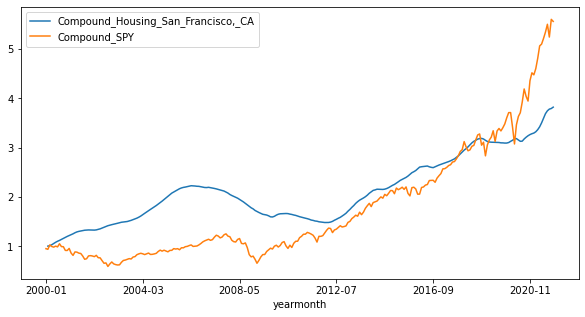

In [18]:
merged[['yearmonth', region_label, f'Compound_{stock_name}']].plot(x="yearmonth", y=[region_label, f'Compound_{stock_name}'], figsize=(10, 5))

In [19]:
merged

,yearmonth,%Change_x,%Change_y,"Compound_Housing_San_Francisco,_CA",Compound_SPY,principal,investment_value_housing,investment_value_SPY,year
0,2000-01,NaN,-0.046613,NaN,0.953387,100000,NaN,95338.681295,2000
1,2000-02,0.005350,-0.013661,1.005350,0.940363,100000,100534.972942,94036.295371,2000
2,2000-03,0.007414,0.095562,1.012803,1.030226,100000,101280.334822,103022.586999,2000
3,2000-04,0.020123,-0.031456,1.033184,0.997819,100000,103318.407344,99781.908996,2000
4,2000-05,0.024890,-0.013149,1.058900,0.984699,100000,105890.046466,98469.898113,2000
...,...,...,...,...,...,...,...,...,...
258,2021-07,0.026127,0.024645,3.689001,5.341912,100000,368900.127133,534191.229754,2021
259,2021-08,0.015750,0.029632,3.747103,5.500203,100000,374710.293307,550020.290572,2021
260,2021-09,0.009125,-0.047023,3.781297,5.241567,100000,378129.676091,524156.735499,2021
261,2021-10,0.003296,0.068390,3.793760,5.600036,100000,379375.977409,560003.633531,2021


In [20]:
def get_aprs(column):
    return merged.groupby(merged.year)[column].sum().reset_index()[column].describe()

In [26]:
print(stock_name)
print(get_aprs('%Change_y'))

SPY
count   22.000000
mean     0.088985
std      0.167378
min     -0.373585
25%      0.029429
50%      0.127250
75%      0.210661
max      0.286227
Name: %Change_y, dtype: float64


In [22]:
460000/3

153333.33333333334

In [23]:
212000-153333.33333333334

58666.66666666666

In [24]:
(326101.064239 - 58666.66666666666)*.3

80230.3192717

In [25]:
326101.064239 - 80230.3192717

245870.74496730004